# Breast Cancer cells classification

## Problem Statement
Breast cancer is a widespread and highly heterogeneous disease, with various subtypes that respond differently to treatments. Accurate classification of breast cancer cells can lead to tailored therapies, reducing the burden of unnecessary treatments and minimizing adverse effects on patients. Developing a model for the accurate classification of breast cancer cells is a critical step towards better understanding, managing, and ultimately conquering breast cancer.

### Not only that, individuals with breast cancer are also at risk of:
-Cardiovascular Diseases: Obesity alongside lifestyle factors can be a predictor for breast cancer and cardiovasular diseases (American Cancer Study, 2022)

-Diabetes: Individuals with type 2 diabetes are at greater risk of developing cancers including breast cancer (American Association for Cancer Research, n.d.)

-Thyroid Disorders: Individuals with tyroid cancer, autoimmune thyroiditis(AITD) are also at a much greater risk of breast cancer (Chen et al., 2021)

### Some quick facts and statistics on individuals with breast cancer in the past
-Breast cancer remains to be one of the most common cancers

-Caused ~685000 deaths globally in 2020

-Despite being common, there is a survival rate of over 90% if detected  and treated early

### Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
breastcancer = pd.read_csv('BreastCancer.csv')

This dataset was gathered from the Breast Cancer Wisconsin (Diagnostic) Data Set, which is available on Kaggle

### Brief look at the dataset

In [3]:
breastcancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


How many null values do I have in the dataset?

In [4]:
breastcancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

As we can see, there are no null values and the data is very clean. A possibility to this is that professionals have used this dataset for machine learning as well and cleaned it in the past.

In [5]:
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
breastcancer.rename(columns = {'target':'cancerous'}, inplace=True)
breastcancer.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'cancerous'],
      dtype='object')

In [7]:
breastcancer.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


A quick read of the average values tells us the magnitude of each feature and that we need to scale them for developing our model.

In [8]:
breastcancer.shape

(569, 31)

In [9]:
breastcancer['cancerous'].unique()

array([0, 1], dtype=int64)

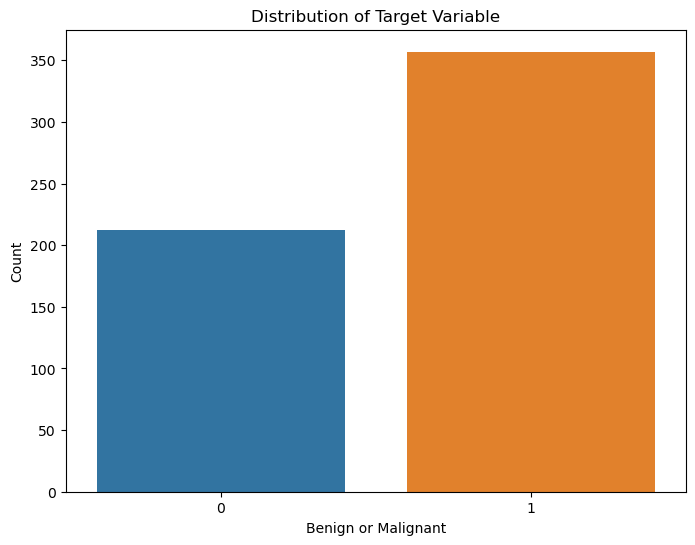

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data = breastcancer, x = 'cancerous')
plt.xlabel('Benign or Malignant')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [11]:
featurestotest = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension','cancerous']
features_in_data = breastcancer[featurestotest]

Dropping the error in measurements as well as limits of measurements to test the correlation between target variable (cancerous) and other features

### How are our features correlated? 

In [12]:
corr_matrix = features_in_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix[mask] = np.nan

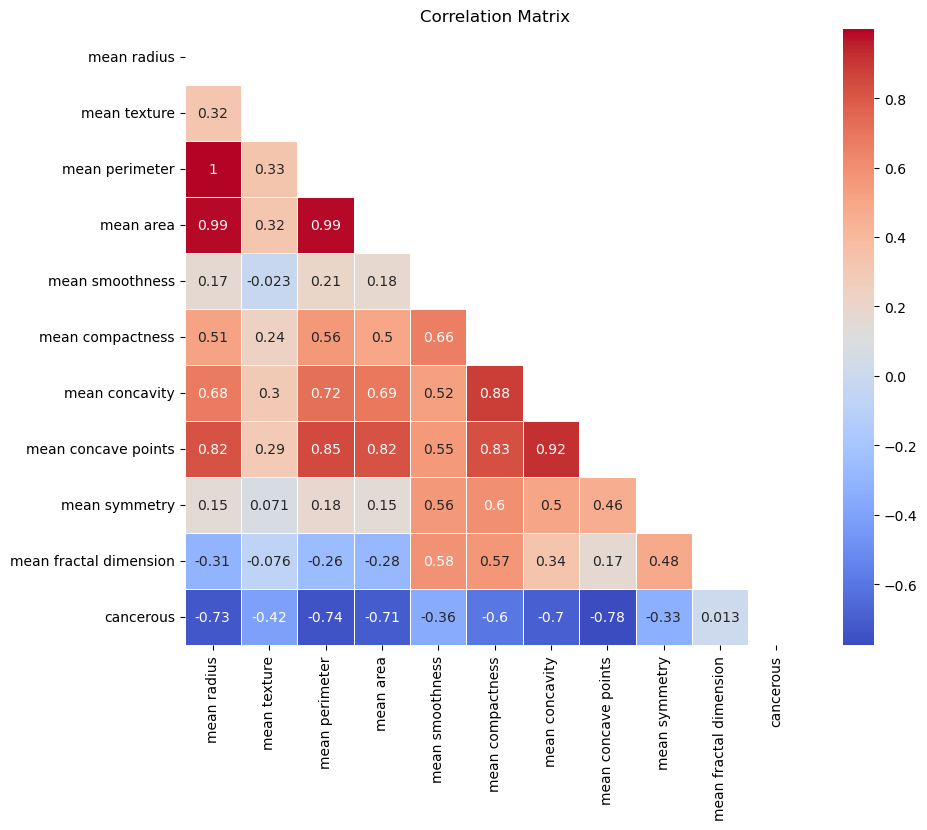

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The features that have the highest correlation with our target variable (cancerous) is mean concave point, mean perimeter, mean radius and mean area, which means they have a strong relationship with our target variable. However, there is multicollinearity for these variables, which suggest that mean radius, mean area and mean perimeter are highly correlated (practically the same thing). Hence, we will use mean area from here on out.

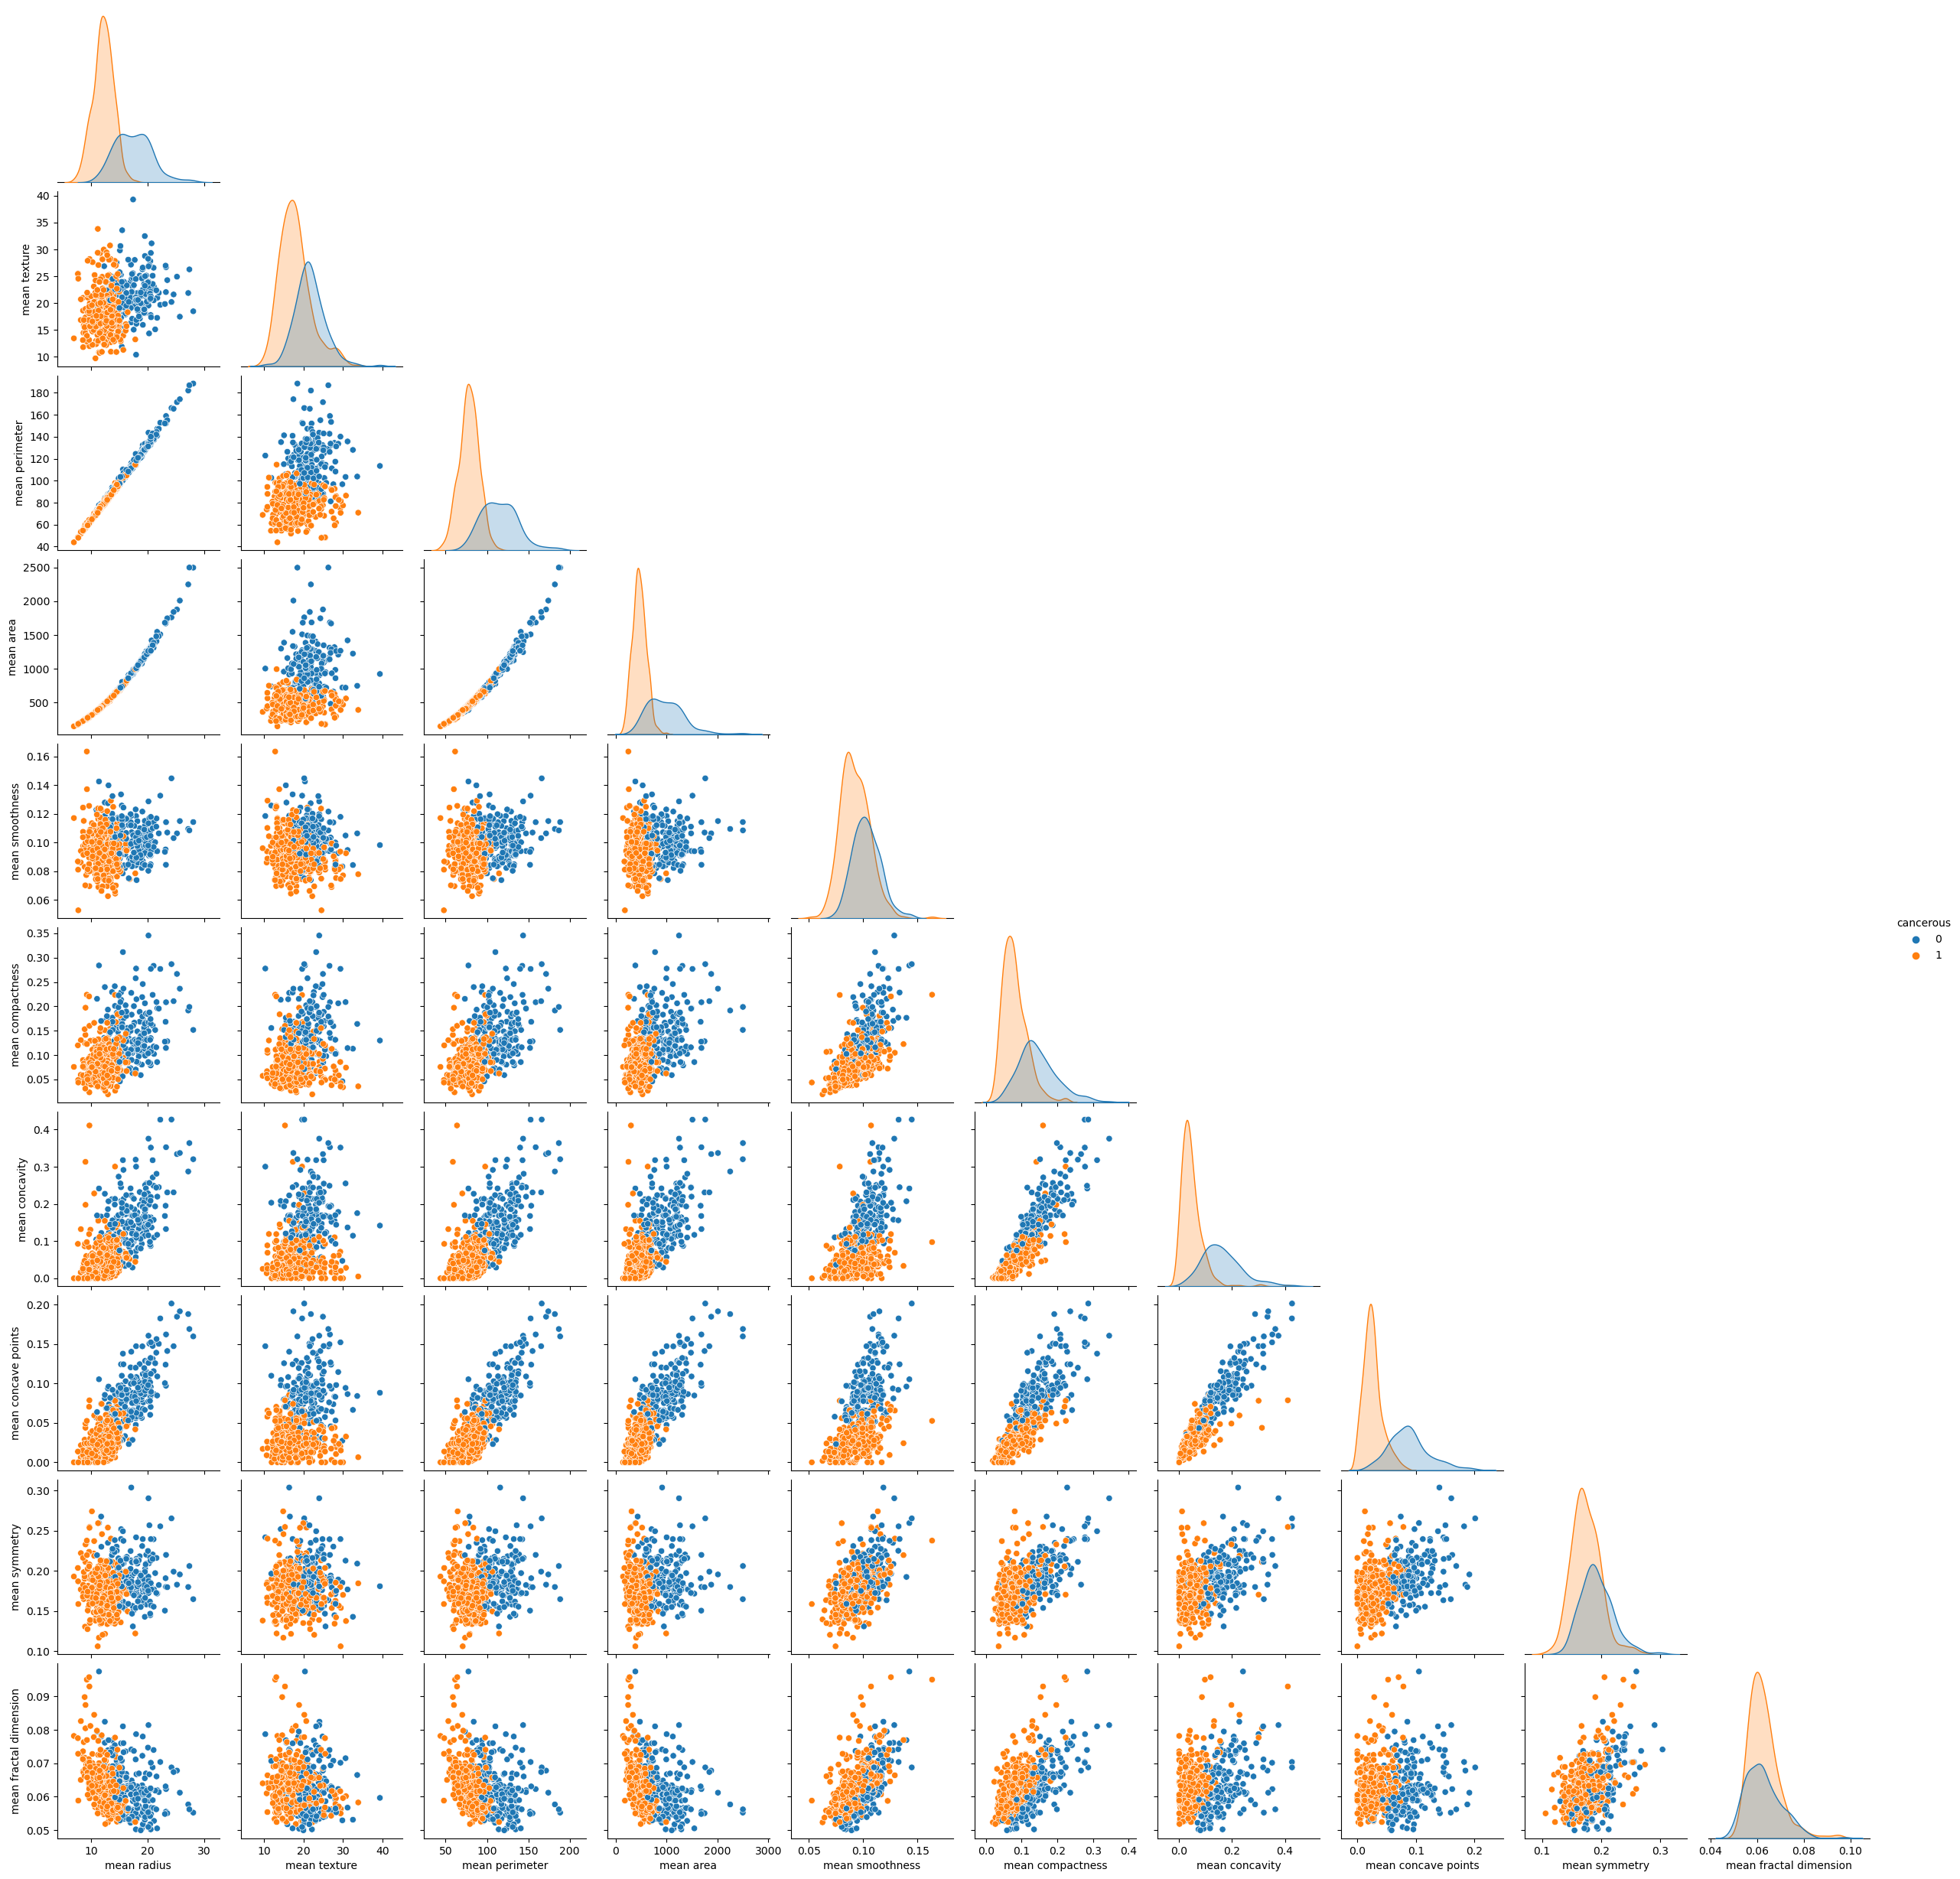

In [14]:
sns.pairplot(breastcancer[featurestotest], hue='cancerous', corner=True)

As we can see, the two classes for cancerous (malignant = 1, and benign = 0) are seperated for features like mean radius, mean perimeter, mean area, mean concavity, mean concave points, and mean compactness. However, the opposite is true for features like mean symmetry, mean fractal dimension, mean smoothness, and mean texture.

### Import scikitlearn modules for building the model

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #split training and testing data
from sklearn.linear_model import LogisticRegression #machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #model evaluation
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import cross_val_score



### Create a table to record metrics and accuracies

In [16]:
models_table = pd.DataFrame(columns=["Model Name",
                                     "Parameters",
                                     "Accuracy (Train)",
                                     "Precision (Train)",
                                     "Recall (Train)",
                                     "F1 Score (Train)",
                                     "Log Loss (Train)",
                                     "Accuracy (Test)",
                                     "Precision (Test)",
                                     "Recall (Test)",
                                     "F1 Score (Test)",
                                     "Log Loss (Test)",
                                     "Cross-validated Accuracy (Test)"])

models_table.head()

,Model Name,Parameters,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Log Loss (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Log Loss (Test),Cross-validated Accuracy (Test)


In [17]:
#accuracies dictionary to store accuracies
accuracies ={}

## Logistic Regression

In [18]:
#define my input features and my target variable
input_features = [item for item in featurestotest if item != 'cancerous']
X = breastcancer[input_features]
y = breastcancer['cancerous']

#split my dataset to train and test datasets, with test size being 40%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#scale my input variables for standardization 
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_scaled = scaler.transform(X)

In [19]:
#fit the standardized X train data with logistic regression algorithm, and then get its accuracy testing with test data
lr = LogisticRegression(random_state=0)
lr.fit(X_train_standardized, y_train)
lracc = lr.score(X_test_standardized,y_test)*100
accuracies['Logistic Regression'] = lracc
print("Logistic Regression Test Accuracy {:.2f}%".format(lracc))

Logistic Regression Test Accuracy 93.86%


In [20]:
#cross validate the accuracy for logistic regression
lr_cross_val_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(lr_cross_val_scores)*100
print("Cross Validated Accuracy for Logistic Regression: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for Logistic Regression: 96.07%


In [21]:
y_train_pred = lr.predict(X_train_standardized)
y_test_pred = lr.predict(X_test_standardized)

#metrics for logistic regression on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, lr.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, lr.predict_proba(X_test_standardized))

In [22]:
table_1_base = {"Model Name":"Logistic Regression",
                     "Parameters":"Default",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add logistic regression's base model metrics to the table
models_table = models_table.append(table_1_base, ignore_index=True)

In [23]:
models_table

,Model Name,Parameters,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Log Loss (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,Default,95.014663,94.930876,97.169811,96.037296,0.139655,93.859649,92.810458,97.931034,95.302013,0.143682,96.068075


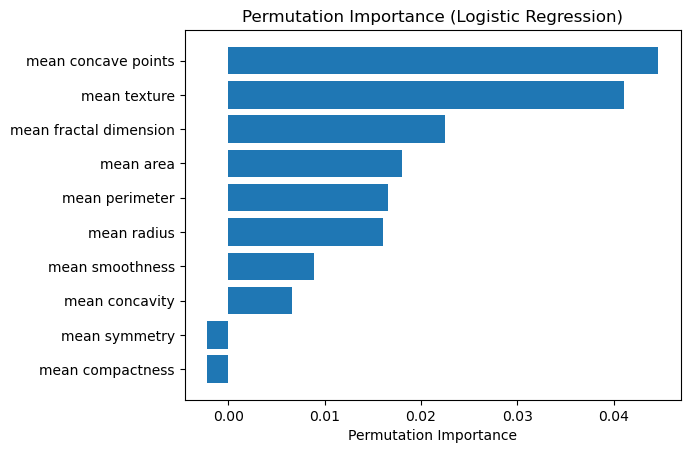

In [24]:
#run permutation importance to find the importance of input features
perm_importance = permutation_importance(lr, X_test_standardized, y_test, n_repeats=30, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Logistic Regression)')
plt.show()

In [25]:
#removed features that have importance score <0.005, dropped mean symmetry and mean compactness
lrfeaturestotest = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean concavity','mean concave points','mean fractal dimension']
X = breastcancer[lrfeaturestotest]
y = breastcancer['cancerous']

#split my train and test dataset again with the new input features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#scale my input features for standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_scaled = scaler.transform(X)

In [26]:
#run logistic regression with the new input features and get its new accuracy
lr = LogisticRegression(random_state=0)
lr.fit(X_train_standardized, y_train)
lracc = lr.score(X_test_standardized,y_test)*100
accuracies['Logistic Regression'] = lracc
print("Logistic Regression Test Accuracy (Standardized): {:.2f}%".format(lracc))

Logistic Regression Test Accuracy (Standardized): 94.30%


### Finding the best parameters for Logistic Regression Model
We would want to focus on the scoring for recall because our goal is to reduce the rate of false negatives so that malignant cells are correctly identified.

In [27]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

In [28]:
#use randomized search to find the best parameters for the logistic regression model, and then test the accuracy again 

param_dist = {
    'C': uniform(loc=0, scale=4),  # Inverse of regularization strength (log-uniform distribution)
    'penalty': ['l1', 'l2'],      # Regularization penalty type
    'solver': ['liblinear', 'saga'],  # Solver algorithm
}

lr_random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist, scoring='recall', n_iter=300, cv=5, random_state=42)
lr_random_search.fit(X_train_standardized, y_train)
lr_best_params = lr_random_search.best_params_
best_lr_model = LogisticRegression(random_state=42, **lr_best_params)
best_lr_model.fit(X_train_standardized, y_train)

#here we are testing the model on the train data to check 
lr_train_accuracy = best_lr_model.score(X_train_standardized, y_train)*100
print("Test Accuracy for Logistic Regression with Best Hyperparameters (train data): {:.2f}%".format(lr_train_accuracy))
lr_test_accuracy = best_lr_model.score(X_test_standardized, y_test)*100
print("Test Accuracy for Logistic Regression with Best Hyperparameters (test data): {:.2f}%".format(lr_test_accuracy))

print(lr_best_params)
y_train_pred = best_lr_model.predict(X_train_standardized)
y_test_pred = best_lr_model.predict(X_test_standardized)


Test Accuracy for Logistic Regression with Best Hyperparameters (train data): 92.67%
Test Accuracy for Logistic Regression with Best Hyperparameters (test data): 92.54%
{'C': 0.020246335384874747, 'penalty': 'l2', 'solver': 'saga'}


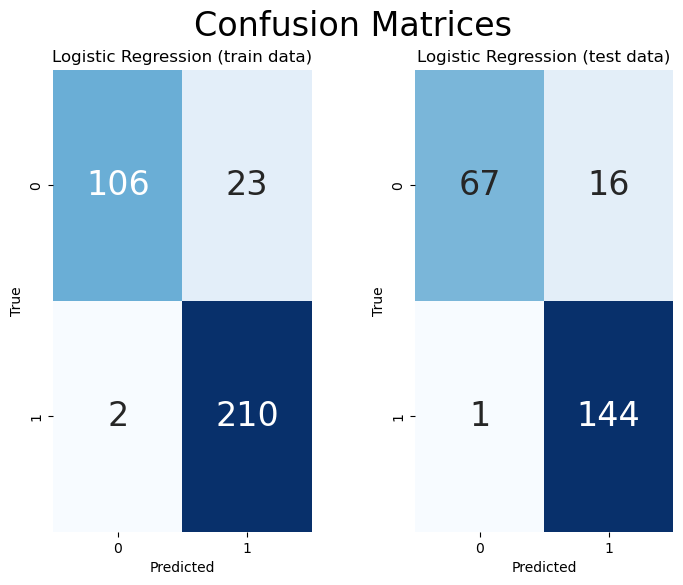

In [29]:
from sklearn.metrics import confusion_matrix
#confusion matrix for train data
y_train_pred = best_lr_model.predict(X_train_standardized)
trainconfusion = confusion_matrix(y_train, y_train_pred)
#confusion matrix for test data
testconfusion = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1) #2x2 grid position 1
plt.title("Logistic Regression (train data)")
sns.heatmap(trainconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2) #2x2 grid position 2
plt.title("Logistic Regression (test data)")
sns.heatmap(testconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

### Cross validating the test data and finding mean accuracy for Logistic Regression

In [30]:
#cross validate the accuracy for logistic regression
lr_cross_val_scores = cross_val_score(best_lr_model, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(lr_cross_val_scores)*100
print("Cross Validated Accuracy for Logistic Regression: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for Logistic Regression: 99.44%


In [31]:
#metrics for logistic regression on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, best_lr_model.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, best_lr_model.predict_proba(X_test_standardized))

In [32]:
table_1 = {"Model Name":"Logistic Regression",
                     "Parameters":"Best Params",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add logistic regression's metrics to the table
models_table = models_table.append(table_1, ignore_index=True)

In [33]:
models_table

,Model Name,Parameters,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Log Loss (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,Default,95.014663,94.930876,97.169811,96.037296,0.139655,93.859649,92.810458,97.931034,95.302013,0.143682,96.068075
1,Logistic Regression,Best Params,92.668622,90.128755,99.056604,94.382022,0.240655,92.543860,90.000000,99.310345,94.426230,0.234627,99.436620


## Decision Tree Classifier

In [34]:
input_features = [item for item in featurestotest if item != 'cancerous']
X = breastcancer[input_features]
y = breastcancer['cancerous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_scaled = scaler.transform(X)
accuracies ={}

In [35]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_standardized, y_train)
dtcacc = dtc.score(X_test_standardized, y_test)*100
accuracies['Decision Tree Classifier'] = dtcacc
print("Decision Tree Classifier Test Accuracy {:.2f}%".format(dtcacc))

Decision Tree Classifier Test Accuracy 91.67%


In [36]:
#cross validate the accuracy for logistic regression
dtc_cross_val_scores = cross_val_score(dtc, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(dtc_cross_val_scores)*100
print("Cross Validated Accuracy for Logistic Regression: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for Logistic Regression: 93.00%


In [37]:
y_train_pred = dtc.predict(X_train_standardized)
y_test_pred = dtc.predict(X_test_standardized)

#metrics for decision tree classifier on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, dtc.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, dtc.predict_proba(X_test_standardized))

In [38]:
table_2_base = {"Model Name":"Decision Tree Classifier",
                     "Parameters":"Default",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add decision tree classifier's base model metrics to the table
models_table = models_table.append(table_2_base, ignore_index=True)

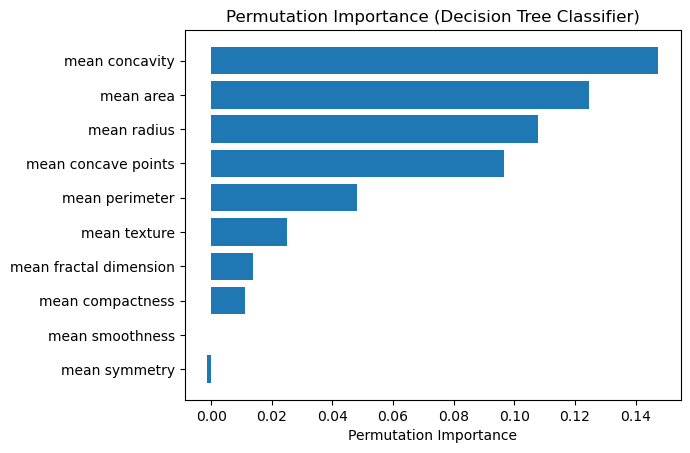

In [39]:
perm_importance = permutation_importance(dtc, X_test_standardized, y_test, n_repeats=30, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Decision Tree Classifier)')
plt.show()

In [40]:
#removed features that have importance score <0.005, dropped mean smoothness and mean symmetry
dtcfeaturestotest = ['mean radius','mean texture','mean perimeter','mean area','mean compactness','mean concavity','mean concave points','mean fractal dimension']
X = breastcancer[dtcfeaturestotest]
y = breastcancer['cancerous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_scaled = scaler.transform(X)

In [41]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_standardized, y_train)
dtcacc = dtc.score(X_test_standardized, y_test)*100
accuracies['Decision Tree Classifier'] = dtcacc
print("Decision Tree Classifier Test Accuracy (Standardized): {:.2f}%".format(dtcacc))

Decision Tree Classifier Test Accuracy (Standardized): 92.54%


### Finding the best parameters for Decision Tree Classifier Model

In [42]:
#use randomized search to find the best parameters for the decision tree classifier, and then test the accuracy again 

param_dist = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': randint(1, 20),       # Max depth of the tree (random integer from 1 to 20)
    'min_samples_split': randint(2, 20),  # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),   # Minimum samples required at each leaf node
}
dtc_random_search = RandomizedSearchCV(estimator=dtc, param_distributions=param_dist, scoring='recall', n_iter=200, cv=5, random_state=42)
dtc_random_search.fit(X_train_standardized, y_train)
dtc_best_params = dtc_random_search.best_params_
best_dtc = DecisionTreeClassifier(random_state=42, **dtc_best_params)
best_dtc.fit(X_train_standardized,y_train)
#here we are testing the model on the train data to check 
dtc_train_accuracy = best_dtc.score(X_train_standardized,y_train)*100
print("Test Accuracy for Decision Tree Classifier with Best Hyperparameters (train data): {:.2f}%".format(dtc_train_accuracy))
dtc_test_accuracy = best_dtc.score(X_test_standardized,y_test)*100
print("Test Accuracy for Decision Tree Classifier with Best Hyperparameters (test data): {:.2f}%".format(dtc_test_accuracy))

print(dtc_best_params)
y_train_pred = best_dtc.predict(X_train_standardized)
y_test_pred = best_dtc.predict(X_test_standardized)

Test Accuracy for Decision Tree Classifier with Best Hyperparameters (train data): 96.19%
Test Accuracy for Decision Tree Classifier with Best Hyperparameters (test data): 92.11%
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 18}


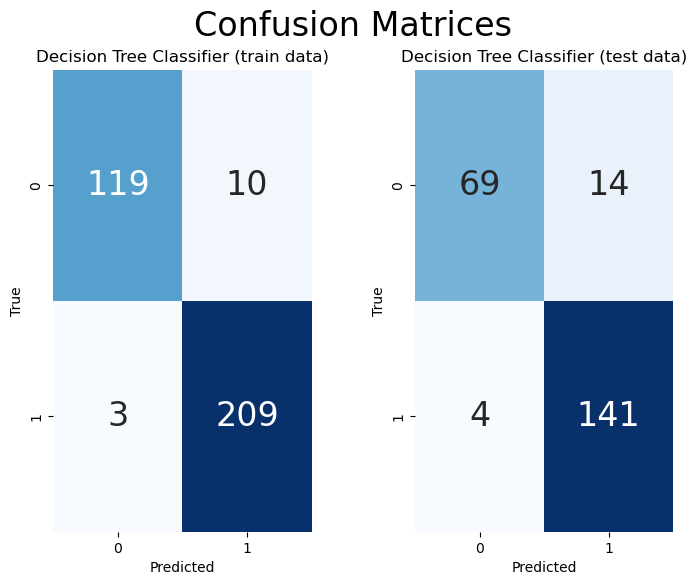

In [43]:
#confusion matrix for train data
trainconfusion = confusion_matrix(y_train, y_train_pred)
#confusion matrix for test data
testconfusion = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1) #2x2 grid position 1
plt.title("Decision Tree Classifier (train data)")
sns.heatmap(trainconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2) #2x2 grid position 2
plt.title("Decision Tree Classifier (test data)")
sns.heatmap(testconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

### Cross validating the test data and finding mean accuracy for Decision Tree Classifier

In [44]:
dtc_cross_val_scores = cross_val_score(best_dtc, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(dtc_cross_val_scores)*100
print("Cross Validated Accuracy for Decision Tree Classifier: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for Decision Tree Classifier: 92.72%


RocCurveDisplay.from_predictions(y_test, best_dtc.predict(X_test_standardized), plot_chance_level=True)
plt.show()

In [45]:
#metrics for decision tree classifier on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, best_dtc.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, best_dtc.predict_proba(X_test_standardized))

In [46]:
table_2 ={"Model Name":"Decision Tree Classifier",
                     "Parameters":"Best Params",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add decision tree classifier's metrics to the table
models_table = models_table.append(table_2, ignore_index=True)

In [47]:
models_table

,Model Name,Parameters,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Log Loss (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,Default,95.014663,94.930876,97.169811,96.037296,1.396549e-01,93.859649,92.810458,97.931034,95.302013,0.143682,96.068075
1,Logistic Regression,Best Params,92.668622,90.128755,99.056604,94.382022,2.406548e-01,92.543860,90.000000,99.310345,94.426230,0.234627,99.436620
2,Decision Tree Classifier,Default,100.000000,100.000000,100.000000,100.000000,2.220446e-16,91.666667,92.000000,95.172414,93.559322,3.003638,92.996870
3,Decision Tree Classifier,Best Params,96.187683,95.433790,98.584906,96.983759,8.086386e-02,92.105263,90.967742,97.241379,94.000000,1.198936,92.719092


## Random Forest Classifier

In [48]:
input_features = [item for item in featurestotest if item != 'cancerous']
X = breastcancer[input_features]
y = breastcancer['cancerous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
X_scaled = scaler.transform(X)

accuracies ={}

In [49]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_standardized, y_train)
rfcacc = rfc.score(X_test_standardized, y_test)*100
accuracies['Random Forest Classifier'] = rfcacc
print("Random Forest Classifier Test Accuracy {:.2f}%".format(rfcacc))

Random Forest Classifier Test Accuracy 92.54%


In [50]:
#cross validate the accuracy for logistic regression
rfc_cross_val_scores = cross_val_score(rfc, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(rfc_cross_val_scores)*100
print("Cross Validated Accuracy for Logistic Regression: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for Logistic Regression: 96.08%


In [51]:
y_train_pred = rfc.predict(X_train_standardized)
print(recall_score(y_train, y_train_pred)*100)
y_test_pred = rfc.predict(X_test_standardized)
print(recall_score(y_test, y_test_pred)*100)

#metrics for random forest classifier on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, rfc.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, rfc.predict_proba(X_test_standardized))

100.0
95.86206896551724


In [52]:
table_3_base = {"Model Name":"Random Forest Classifier",
                     "Parameters":"Default",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add random forest classifier base model's metrics to the table
models_table = models_table.append(table_3_base, ignore_index=True)

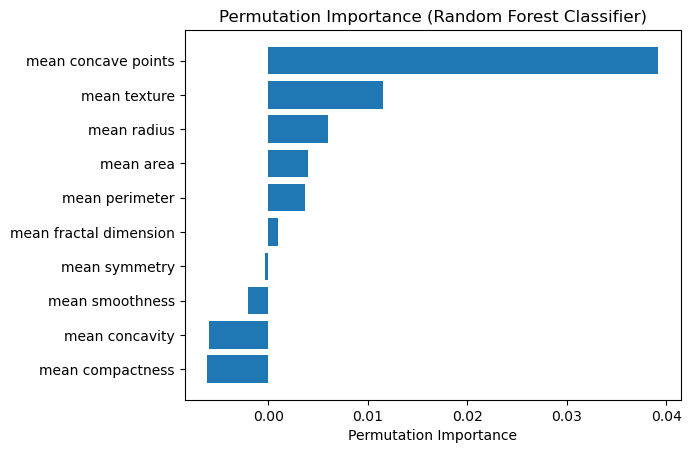

In [53]:
perm_importance = permutation_importance(rfc, X_test_standardized, y_test, n_repeats=30, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (Random Forest Classifier)')
plt.show()

In [54]:
#drop features with importance of <0.005, dropped mean fractal dimension, mean smoothness and mean perimeter
rfcfeaturestotest = ['mean radius','mean texture','mean area','mean compactness','mean concavity','mean concave points','mean symmetry']
X = breastcancer[rfcfeaturestotest]
y = breastcancer['cancerous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_scaled = scaler.transform(X)

In [55]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_standardized, y_train)
rfcacc = rfc.score(X_test_standardized, y_test)*100
accuracies['Random Forest Classifier'] = rfcacc
print("Random Forest Classifier Test Accuracy (Standardized): {:.2f}%".format(rfcacc))

Random Forest Classifier Test Accuracy (Standardized): 92.98%


### Finding the best parameters for Random Forest Classifier model

In [56]:
param_dist = {
    'n_estimators': randint(50, 200),            # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider when splitting
    'max_depth': randint(10, 100),              # Maximum depth of the trees
    'min_samples_split': randint(2, 20),         # Minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),          # Minimum samples required at each leaf node
    'bootstrap': [True, False],                  # Whether to bootstrap samples
}

rfc_random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, scoring='recall', n_iter=200, cv=5, random_state=42)
rfc_random_search.fit(X_train_standardized, y_train)
rfc_best_params = rfc_random_search.best_params_
best_rfc = RandomForestClassifier(random_state=42, **rfc_best_params)
best_rfc.fit(X_train_standardized,y_train)
#here we are testing the model on the train data to check 
rfc_train_accuracy = best_rfc.score(X_train_standardized,y_train)*100
rfc_test_accuracy = best_rfc.score(X_test_standardized,y_test)*100
print("Test Accuracy for Random Forest Classifier with Best Hyperparameters (train data): {:.2f}%".format(rfc_train_accuracy))
print("Test Accuracy for Random Forest Classifier with Best Hyperparameters (train data): {:.2f}%".format(rfc_test_accuracy))
print(rfc_best_params)

y_train_pred = best_rfc.predict(X_train_standardized)
print(recall_score(y_train, y_train_pred)*100)
y_test_pred = best_rfc.predict(X_test_standardized)
print(recall_score(y_test, y_test_pred)*100)

Test Accuracy for Random Forest Classifier with Best Hyperparameters (train data): 99.71%
Test Accuracy for Random Forest Classifier with Best Hyperparameters (train data): 92.11%
{'bootstrap': True, 'max_depth': 36, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 135}
100.0
95.86206896551724


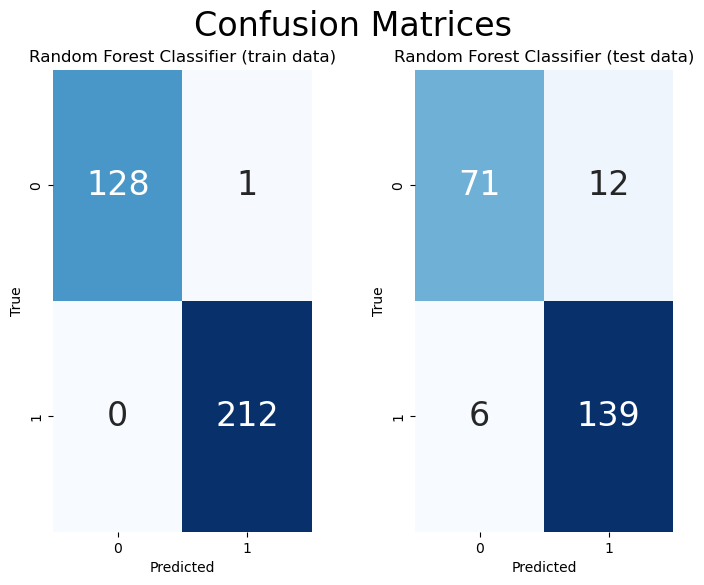

In [57]:
#confusion matrix for train data
trainconfusion = confusion_matrix(y_train, y_train_pred)
#confusion matrix for test data
testconfusion = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1) #2x2 grid position 1
plt.title("Random Forest Classifier (train data)")
sns.heatmap(trainconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2) #2x2 grid position 2
plt.title("Random Forest Classifier (test data)")
sns.heatmap(testconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

### cross validating the test data and finding mean accuracy for Random Forest classifier

In [58]:
rfc_cross_val_scores = cross_val_score(best_rfc, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(rfc_cross_val_scores)*100
print("Cross Validated Accuracy for Random Forest Classifier: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for Random Forest Classifier: 95.79%


In [59]:
#metrics for random forest classifier on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, best_rfc.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, best_rfc.predict_proba(X_test_standardized))

In [60]:
table_3 ={"Model Name":"Random Forest Classifier",
                     "Parameters":"Best Params",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add random forest classifier metrics to the table
models_table = models_table.append(table_3, ignore_index=True)

In [61]:
models_table

,Model Name,Parameters,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Log Loss (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,Default,95.014663,94.930876,97.169811,96.037296,1.396549e-01,93.859649,92.810458,97.931034,95.302013,0.143682,96.068075
1,Logistic Regression,Best Params,92.668622,90.128755,99.056604,94.382022,2.406548e-01,92.543860,90.000000,99.310345,94.426230,0.234627,99.436620
2,Decision Tree Classifier,Default,100.000000,100.000000,100.000000,100.000000,2.220446e-16,91.666667,92.000000,95.172414,93.559322,3.003638,92.996870
3,Decision Tree Classifier,Best Params,96.187683,95.433790,98.584906,96.983759,8.086386e-02,92.105263,90.967742,97.241379,94.000000,1.198936,92.719092
4,Random Forest Classifier,Default,100.000000,100.000000,100.000000,100.000000,4.298869e-02,92.543860,92.666667,95.862069,94.237288,0.158104,96.075900
5,Random Forest Classifier,Best Params,99.706745,99.530516,100.000000,99.764706,6.158698e-02,92.105263,92.052980,95.862069,93.918919,0.158749,95.794210


## KNeighbors Classifier 

In [62]:
input_features = [item for item in featurestotest if item != 'cancerous']
X = breastcancer[input_features]
y = breastcancer['cancerous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_scaled = scaler.transform(X)
accuracies ={}

In [63]:
knn = KNeighborsClassifier()
knn.fit(X_train_standardized, y_train)
knnacc = knn.score(X_test_standardized, y_test)*100
accuracies['KNeighbors Classifier'] = knnacc
print("KNeighbors Classifier Test Accuracy {:.2f}%".format(knnacc))

KNeighbors Classifier Test Accuracy 91.67%


In [64]:
#cross validate the accuracy for logistic regression
knn_cross_val_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(knn_cross_val_scores)*100
print("Cross Validated Accuracy for Logistic Regression: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for Logistic Regression: 95.79%


In [65]:
y_train_pred = knn.predict(X_train_standardized)
print(recall_score(y_train, y_train_pred)*100)
y_test_pred = knn.predict(X_test_standardized)
print(recall_score(y_test, y_test_pred)*100)

#metrics for kneighbors classifier on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, knn.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, knn.predict_proba(X_test_standardized))

96.22641509433963
93.10344827586206


In [66]:
table_4_base = {"Model Name":"KNeighbors Classifier",
                     "Parameters":"Default",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add kneighbors classifier base model's metrics to the table
models_table = models_table.append(table_4_base, ignore_index=True)

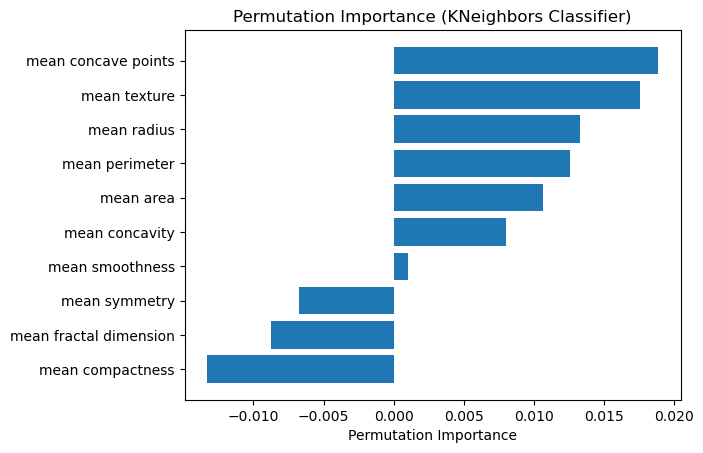

In [67]:
perm_importance = permutation_importance(knn, X_test_standardized, y_test, n_repeats=30, random_state=0)

# Get feature names
feature_names = X_test.columns

# Calculate mean importance and sort features
mean_importance = perm_importance.importances_mean
sorted_idx = mean_importance.argsort()

# Plot permutation importance
plt.barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance (KNeighbors Classifier)')
plt.show()

In [68]:
#drop features with importance of <0.005, dropped mean smoothness
knnfeaturestotest = ['mean radius','mean texture','mean perimeter','mean area','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension']
X = breastcancer[rfcfeaturestotest]
y = breastcancer['cancerous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_scaled = scaler.transform(X)

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train_standardized, y_train)
knnacc = knn.score(X_test_standardized, y_test)*100
accuracies['KNeighbors Classifier'] = knnacc
print("KNeighbors Classifier Test Accuracy (Standardized): {:.2f}%".format(knnacc))

KNeighbors Classifier Test Accuracy (Standardized): 92.54%


## find best parameters for KNeighbors Classifier model and test for accuracy

In [70]:
param_dist = {
    'n_neighbors': randint(1, 20),             # Number of neighbors to consider
    'weights': ['uniform', 'distance'],       # Weight function for prediction
    'p': [1, 2]                               # Power parameter for the Minkowski distance
}

knn_random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, scoring='recall', n_iter=200, cv=5, random_state=42)
knn_random_search.fit(X_train_standardized, y_train)
knn_best_params = knn_random_search.best_params_
best_knn_classifier = KNeighborsClassifier(**knn_best_params)
best_knn_classifier.fit(X_train_standardized, y_train)
knn_train_accuracy = best_knn_classifier.score(X_train_standardized, y_train)*100
print("Test Accuracy for KNeighbors Classifier with Best Hyperparameters (train data): {:.2f}%".format(knn_train_accuracy))
knn_test_accuracy = best_knn_classifier.score(X_test_standardized, y_test)*100
print("Test Accuracy for KNeighbors Classifier with Best Hyperparameters (test data): {:.2f}%".format(knn_test_accuracy))

print(knn_best_params)

y_train_pred = best_knn_classifier.predict(X_train_standardized)
print(recall_score(y_train, y_train_pred)*100)
y_test_pred = best_knn_classifier.predict(X_test_standardized)
print(recall_score(y_test, y_test_pred)*100)

Test Accuracy for KNeighbors Classifier with Best Hyperparameters (train data): 95.01%
Test Accuracy for KNeighbors Classifier with Best Hyperparameters (test data): 90.79%
{'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
95.75471698113208
94.48275862068965


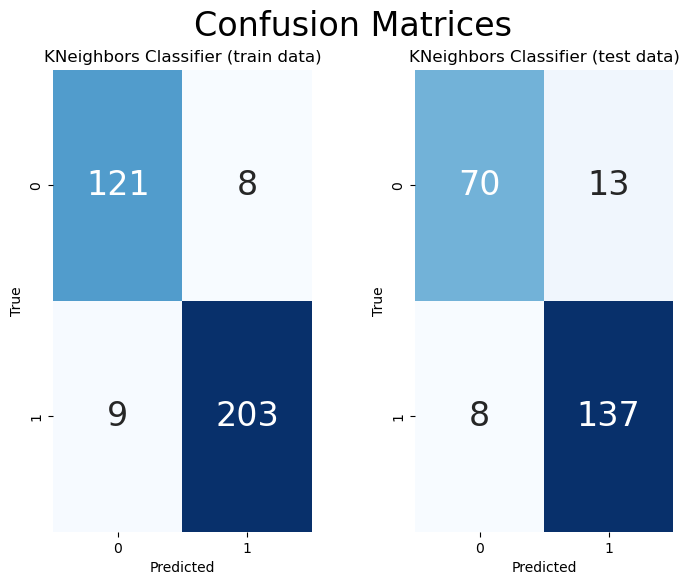

In [71]:
#confusion matrix for train data
trainconfusion = confusion_matrix(y_train, y_train_pred)
#confusion matrix for test data
testconfusion = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1) #2x2 grid position 1
plt.title("KNeighbors Classifier (train data)")
sns.heatmap(trainconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2) #2x2 grid position 2
plt.title("KNeighbors Classifier (test data)")
sns.heatmap(testconfusion,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

In [72]:
knn_cross_val_scores = cross_val_score(best_knn_classifier, X_scaled, y, cv=5, scoring='recall')
cross_val_accuracy = np.mean(knn_cross_val_scores)*100
print("Cross Validated Accuracy for KNeighbors Classifier: {:.2f}%".format(cross_val_accuracy))

Cross Validated Accuracy for KNeighbors Classifier: 96.08%


In [73]:
#metrics for kneighbors classifier on train data and on test data
accuracy_train = accuracy_score(y_train, y_train_pred)*100
precision_train = precision_score(y_train, y_train_pred)*100
recall_train = recall_score(y_train, y_train_pred)*100
f1_train = f1_score(y_train, y_train_pred)*100
log_loss_train = log_loss(y_train, best_knn_classifier.predict_proba(X_train_standardized))

accuracy_test = accuracy_score(y_test, y_test_pred)*100
precision_test = precision_score(y_test, y_test_pred)*100
recall_test = recall_score(y_test, y_test_pred)*100
f1_test = f1_score(y_test, y_test_pred)*100
log_loss_test = log_loss(y_test, best_knn_classifier.predict_proba(X_test_standardized))

In [74]:
table_4 ={"Model Name":"KNeighbors Classifier",
                     "Parameters":"Best Params",
                     "Accuracy (Train)": accuracy_train,
                     "Precision (Train)": precision_train,                           
                     "Recall (Train)": recall_train,
                     "F1 Score (Train)": f1_train,
                     "Log Loss (Train)": log_loss_train,
                     "Accuracy (Test)": accuracy_test,
                     "Precision (Test)": precision_test,
                     "Recall (Test)": recall_test,
                     "F1 Score (Test)": f1_test,
                     "Log Loss (Test)": log_loss_test,
                     "Cross-validated Accuracy (Test)": cross_val_accuracy}

#add kneighbors classifier metrics to the table
models_table = models_table.append(table_4, ignore_index=True)
models_table

,Model Name,Parameters,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train),Log Loss (Train),Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test),Log Loss (Test),Cross-validated Accuracy (Test)
0,Logistic Regression,Default,95.014663,94.930876,97.169811,96.037296,1.396549e-01,93.859649,92.810458,97.931034,95.302013,0.143682,96.068075
1,Logistic Regression,Best Params,92.668622,90.128755,99.056604,94.382022,2.406548e-01,92.543860,90.000000,99.310345,94.426230,0.234627,99.436620
2,Decision Tree Classifier,Default,100.000000,100.000000,100.000000,100.000000,2.220446e-16,91.666667,92.000000,95.172414,93.559322,3.003638,92.996870
3,Decision Tree Classifier,Best Params,96.187683,95.433790,98.584906,96.983759,8.086386e-02,92.105263,90.967742,97.241379,94.000000,1.198936,92.719092
4,Random Forest Classifier,Default,100.000000,100.000000,100.000000,100.000000,4.298869e-02,92.543860,92.666667,95.862069,94.237288,0.158104,96.075900
5,Random Forest Classifier,Best Params,99.706745,99.530516,100.000000,99.764706,6.158698e-02,92.105263,92.052980,95.862069,93.918919,0.158749,95.794210
6,KNeighbors Classifier,Default,94.721408,95.327103,96.226415,95.774648,1.017188e-01,91.666667,93.750000,93.103448,93.425606,0.597930,95.786385
7,KNeighbors Classifier,Best Params,95.014663,96.208531,95.754717,95.981087,1.257131e-01,90.789474,91.333333,94.482759,92.881356,0.166804,96.075900


As we can see here from our model table, logistic regression with the best parameters resulted in a cross validated accuracy of 99.44% and with a recall of 99.31%, which tells us that logistic regression works very well with very high accuracy for the given dataset to predict and classify malignant or benign breast cancer cells in the healthcare and oncology industry.  

### Recommendations
Since breast cancer is related to other diseases (American Association for Cancer
Research, n.d.; American Cancer Study, 2022; Chen et al., 2021), future studies and
researchers can make use of the model to correctly classify malignant cancer cells,
together with characteristics of other illnesses for early detection and prevention of other
conditions and diseases.

One limitation to this model is that it was developed with a relatively small dataset (569
values), future researchers and data scientists could use a larger dataset to more
accurately classify malignant cancer cells.

A more balanced distribution of classes for the target variable in the future would help in
accuracy of the model in classifying benign and malignant cancer cells.